# Penguins_lter Dataset

### *There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.*

### **The columns in this dataset are:**


* #### species: penguin species (Chinstrap, Adélie, or Gentoo)
* #### culmen_length_mm: culmen length (mm)
* #### culmen_depth_mm: culmen depth (mm)
* #### flipper_length_mm: flipper length (mm)
* #### body_mass_g: body mass (g)
* #### island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* #### sex: penguin sex


 #### What are culmen length & depth?
 #### The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).


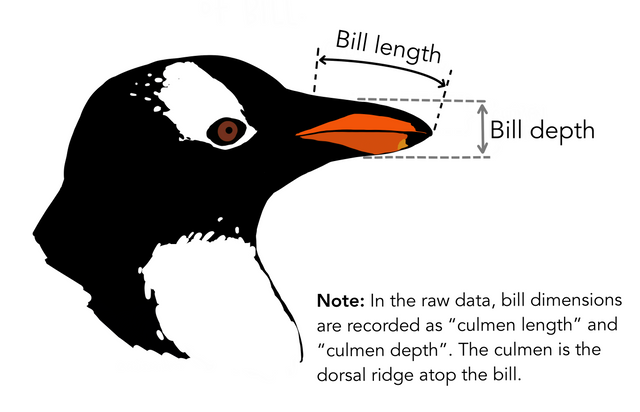

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/Ekeeda-Mini-Project-1/main/penguins_lter.csv")
df.sample(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
69,PAL0809,70,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A2,No,11/11/08,41.8,19.4,198.0,4450.0,MALE,8.86853,-26.06209,Nest never observed with full clutch.
300,PAL0910,81,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N1A1,Yes,11/18/09,49.1,14.5,212.0,4625.0,FEMALE,8.35802,-26.27660,NaN
178,PAL0809,27,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N61A1,No,11/25/08,50.5,18.4,200.0,3400.0,FEMALE,8.93990,-23.89017,NaN


In [3]:
df["Clutch Completion"].value_counts()

Yes    308
No      36
Name: Clutch Completion, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
df.shape

(344, 17)

In [6]:
df.duplicated().sum()

0

### **Why is it important to remove duplicate records from my data?** 
* "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.

* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

In [7]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

### **Why do we need to handle missing values?**
* The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.

## Replacing the null values with its respective mean, median or mode depending on whether its categorical or numerical data.

In [8]:
med1 = df["Culmen Length (mm)"].median()
df["Culmen Length (mm)"].replace(np.nan, med1, inplace = True)

med2 = df["Culmen Depth (mm)"].median()
df["Culmen Depth (mm)"].replace(np.nan, med2, inplace = True)

med3 = df["Flipper Length (mm)"].median()
df["Flipper Length (mm)"].replace(np.nan, med3, inplace = True)

med4 = df["Body Mass (g)"].median()
df["Body Mass (g)"].replace(np.nan, med4, inplace = True)

med5 = df["Delta 15 N (o/oo)"].median()
df["Delta 15 N (o/oo)"].replace(np.nan, med5, inplace = True)

med6 = df["Delta 13 C (o/oo)"].median()
df["Delta 13 C (o/oo)"].replace(np.nan, med6, inplace = True)

mod1 = df["Sex"].mode().values[0]
df["Sex"].replace(np.nan, mod1, inplace = True)

df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

## Dropping all unecessary Columns.
* #### studyName: It is a mixture of categorical and numerical values and are all unique which doesn't give any information.
* #### Sample Number: It's a numerical Value and unique.
* #### Region: There is only one region 'Anvers'
* #### Stage: Its has only one value 'Adult, 1 Egg Stage'
* #### Individual ID: Individual ID gives nothing insightfull.
* #### Delta 15 N (o/oo), Delta 13 C (o/oo): Its a coordinate.
* #### Comments: It has 318 null values out of 344

In [9]:
df = df.drop(columns = ["studyName","Sample Number","Region","Stage","Individual ID","Delta 15 N (o/oo)",
                  "Delta 13 C (o/oo)","Comments"], axis = 1)
df.sample(3)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
244,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,11/29/07,42.9,13.1,215.0,5000.0,FEMALE
38,Adelie Penguin (Pygoscelis adeliae),Dream,No,11/13/07,37.6,19.3,181.0,3300.0,FEMALE
253,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,12/3/07,59.6,17.0,230.0,6050.0,MALE


### **Heatmap**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

In [10]:
correlation = df.corr()
correlation.style.background_gradient()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,-0.235000,0.655858,0.594925
Culmen Depth (mm),-0.235000,1.000000,-0.583832,-0.471942
Flipper Length (mm),0.655858,-0.583832,1.000000,0.871221
Body Mass (g),0.594925,-0.471942,0.871221,1.000000


<AxesSubplot:>

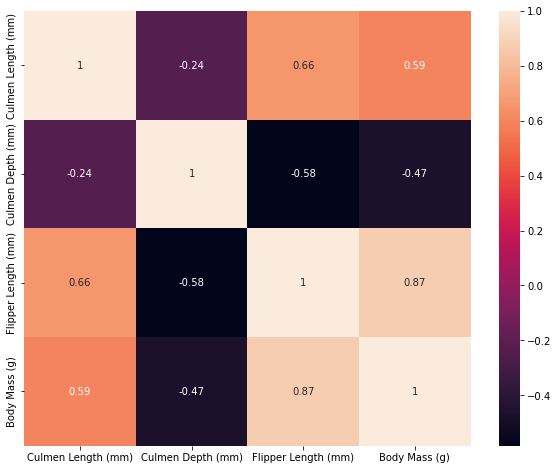

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation , annot = True)

In [12]:
df.sample(3)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
53,Adelie Penguin (Pygoscelis adeliae),Biscoe,Yes,11/9/08,42.0,19.5,200.0,4050.0,MALE
184,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,11/24/08,42.5,16.7,187.0,3350.0,FEMALE
9,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/9/07,42.0,20.2,190.0,4250.0,MALE


In [13]:
df["Island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
def sex_new(x):
    if x == "MALE":
        return 1
    else:
        return 0

In [15]:
df["Sex"] = df["Sex"].apply(sex_new)

In [16]:
df["Sex"].unique()

array([1, 0], dtype=int64)

In [17]:
df["Sex"].value_counts()

1    178
0    166
Name: Sex, dtype: int64

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

## Number of Male Vs Female

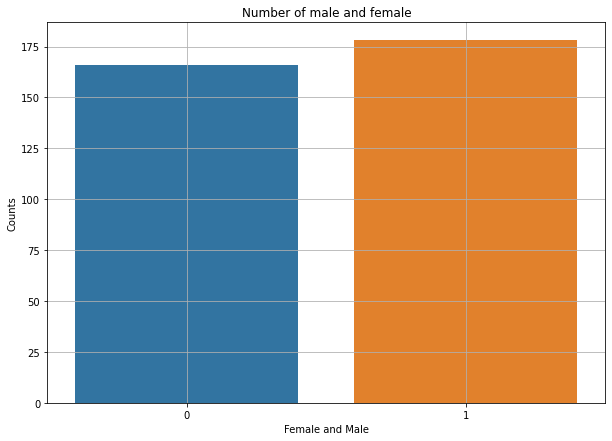

In [18]:
plt.figure(figsize = (10,7))
sns.barplot(x = list(df["Sex"].value_counts().keys()), y = df["Sex"].value_counts())
plt.title("Number of male and female")
plt.xlabel("Female and Male")
plt.ylabel("Counts")
plt.grid()
plt.show()

### Observation -  Number of Male is more than number of female.


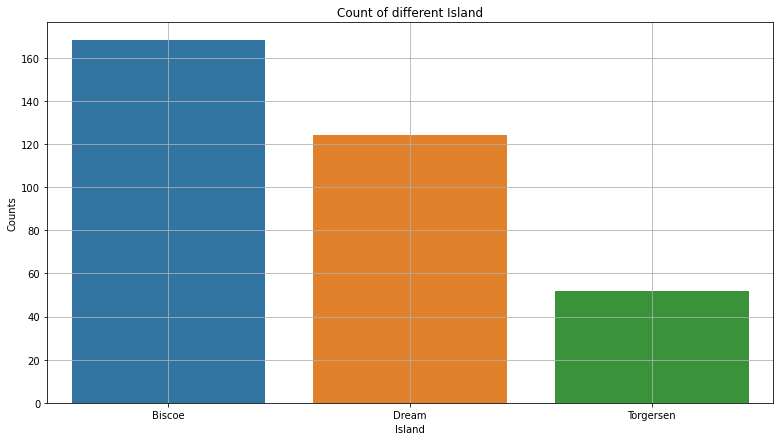

In [19]:
plt.figure(figsize = (13,7))
sns.barplot(x = list(df["Island"].value_counts().keys()), y = df["Island"].value_counts())
plt.title("Count of different Island")
plt.xlabel("Island")
plt.ylabel("Counts")
plt.grid()
plt.show()

### Observation -  Number of Penguins are most in Biscoe island > Dream Island > Torgersen Island

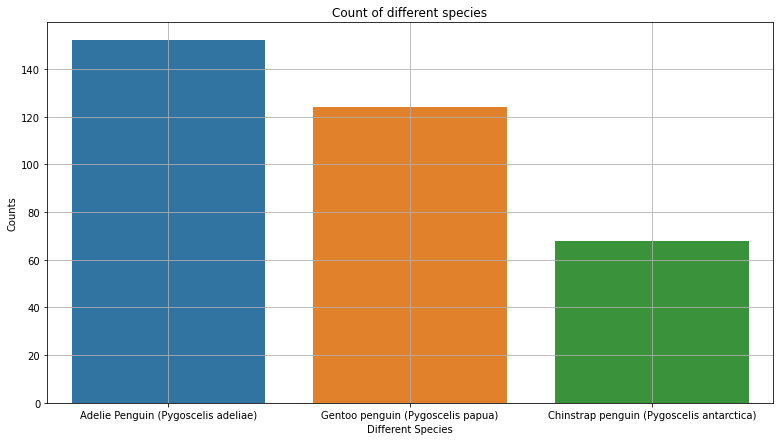

In [20]:
plt.figure(figsize = (13,7))
sns.barplot(x = list(df["Species"].value_counts().keys()), y = df["Species"].value_counts())
plt.title("Count of different species")
plt.xlabel("Different Species")
plt.ylabel("Counts")
plt.grid()
plt.show()

### Observation   
### Number of Penguins are most in Adelie Penguin (Pygoscelis adeliae) > Gentoo penguin (Pygoscelis papua) > Chinstrap Penguin (Pygoscelis antarctica)

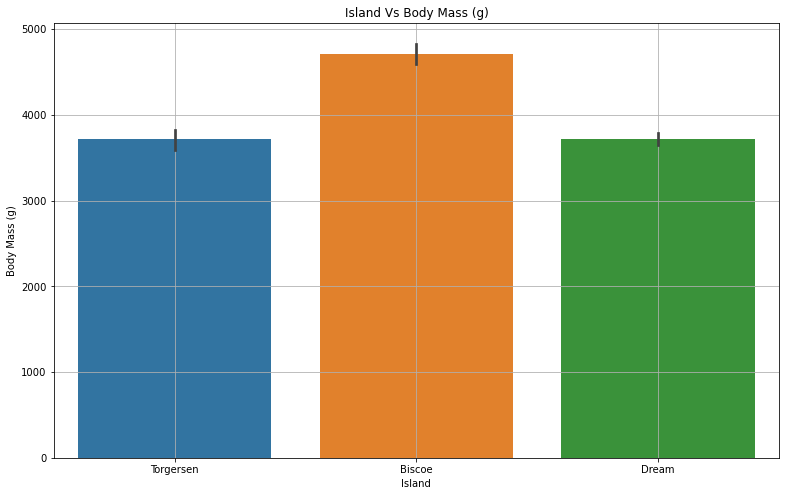

In [21]:
plt.figure(figsize = (13,8))
sns.barplot(x = 'Island',y = 'Body Mass (g)', data = df)
plt.title("Island Vs Body Mass (g)")
plt.xlabel("Island")
plt.ylabel("Body Mass (g)")
plt.grid()
plt.show()

### Observation   
### Most weighed penguins are in Biscoe Island > Torgersen Island = Dream island

## Importing library to ignore warnings

In [22]:
import warnings
warnings.filterwarnings("ignore")

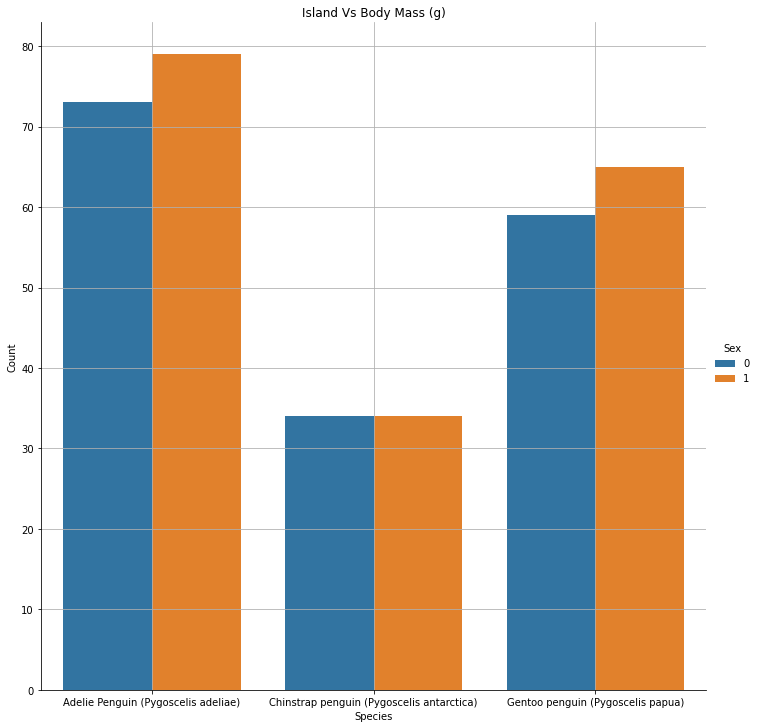

In [23]:
sns.factorplot('Species', hue='Sex', kind='count', data=df, height= 10, aspect=1)
plt.title("Island Vs Body Mass (g)")
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid()
plt.show()

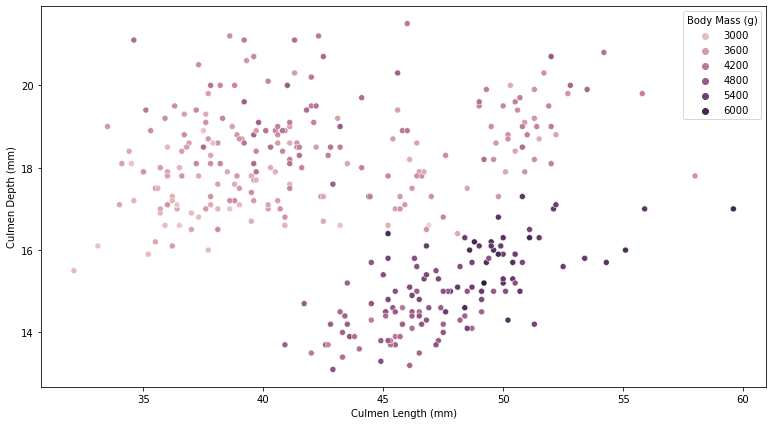

In [24]:
plt.figure(figsize = (13,7))
sns.scatterplot('Culmen Length (mm)','Culmen Depth (mm)',hue='Body Mass (g)',data=df)
plt.show()

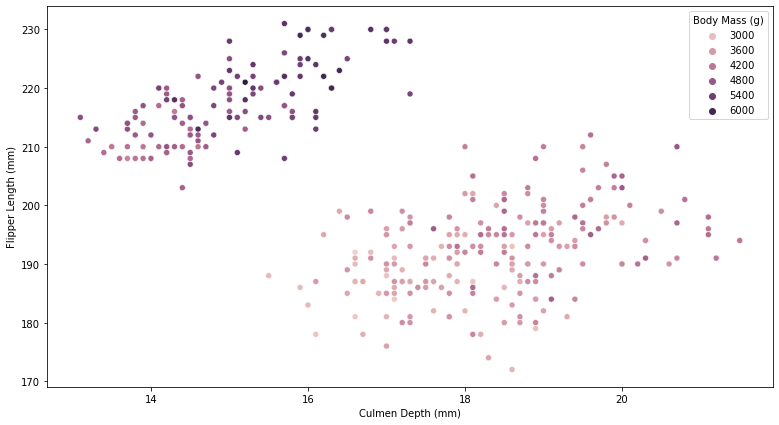

In [25]:
plt.figure(figsize = (13,7))
sns.scatterplot('Culmen Depth (mm)','Flipper Length (mm)', hue='Body Mass (g)',data=df)
plt.show()

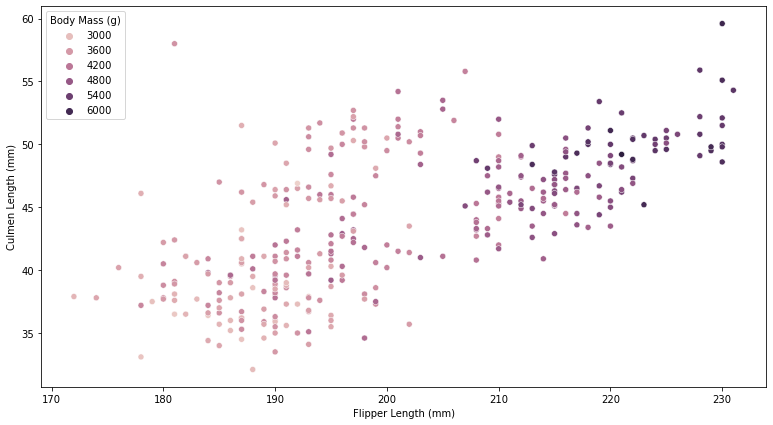

In [26]:
plt.figure(figsize = (13,7))
sns.scatterplot('Flipper Length (mm)', 'Culmen Length (mm)', hue='Body Mass (g)',data=df)
plt.show()

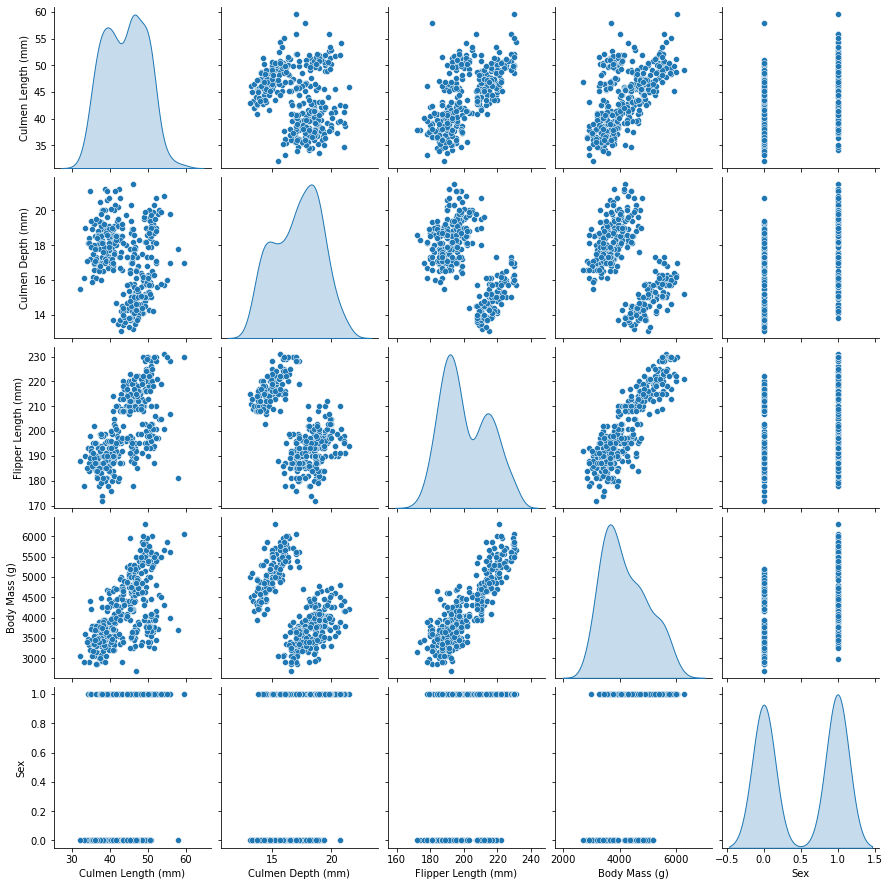

In [27]:
sns.pairplot(df,diag_kind = "kde")

## Conclusion

* The number of male species is more than female
* on Island Bisco, species 'Gentoo' are present in highest no and overall large no of species is present here
* Torgersen island has lowest no of overall species
* Gentoo species has highest of all body mass
* flpper_length,culmen_length are highly corealted to body mass
* Adelie species is largest among all in numbers.